In [1]:
import pandas as pd

# load the training dataset
url='https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv'
diabetes = pd.read_csv(url)
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [2]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
  Label: 0
Patient 2 
  Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
  Label: 0
Patient 3 
  Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
  Label: 0
Patient 4 
  Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
  Label: 1


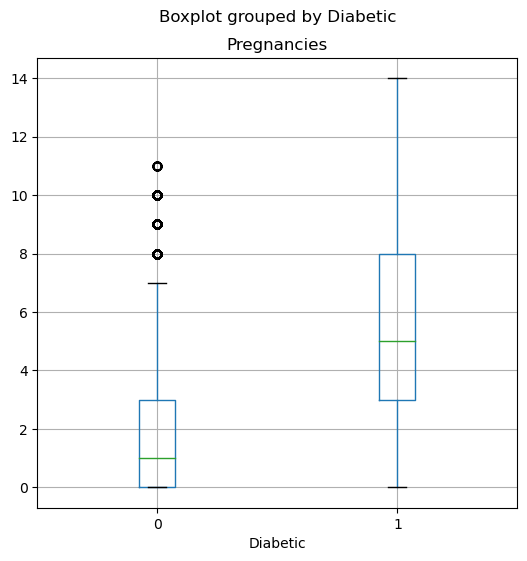

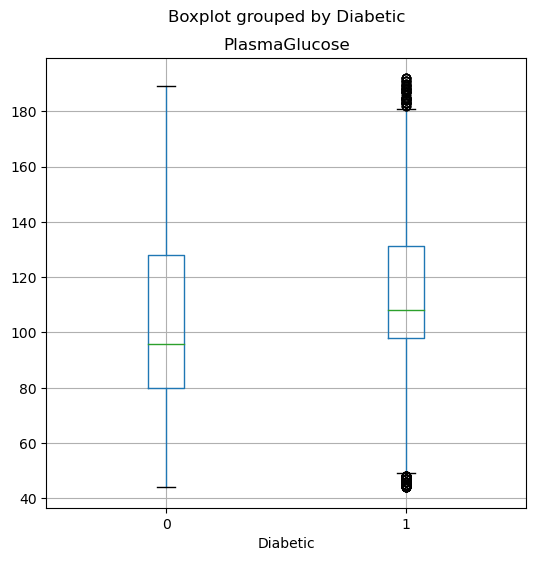

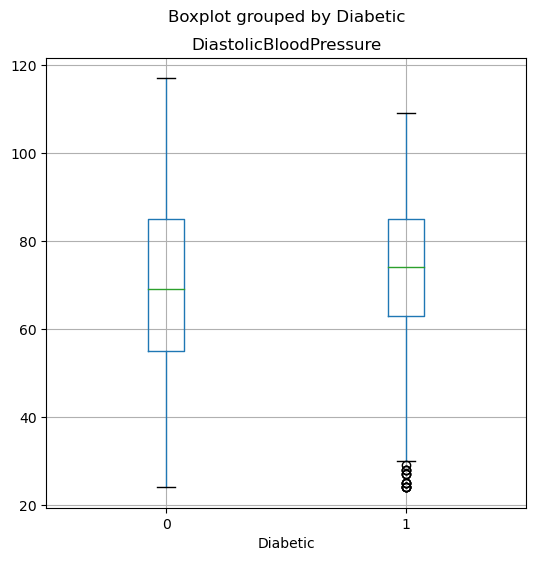

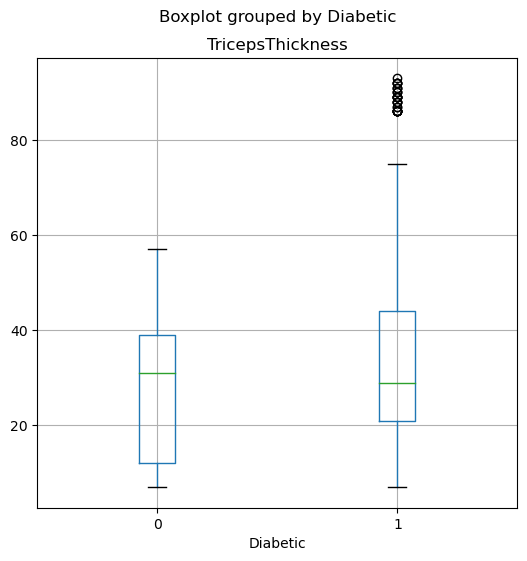

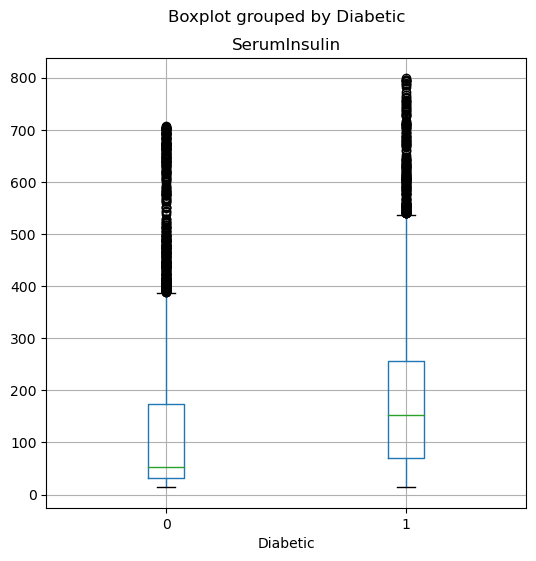

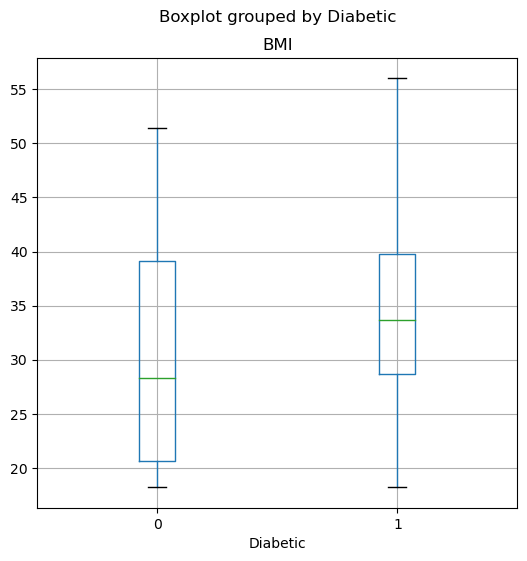

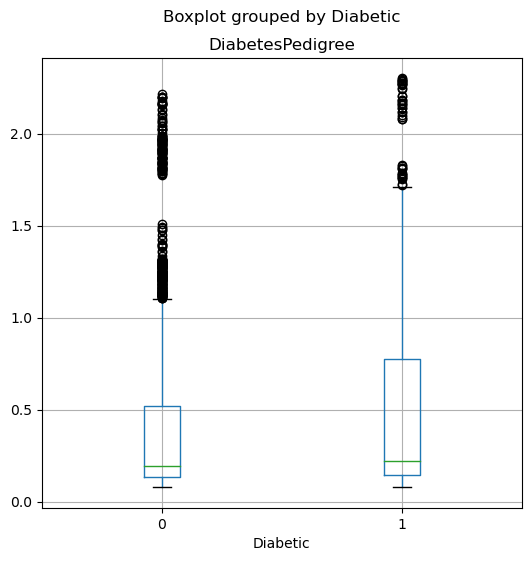

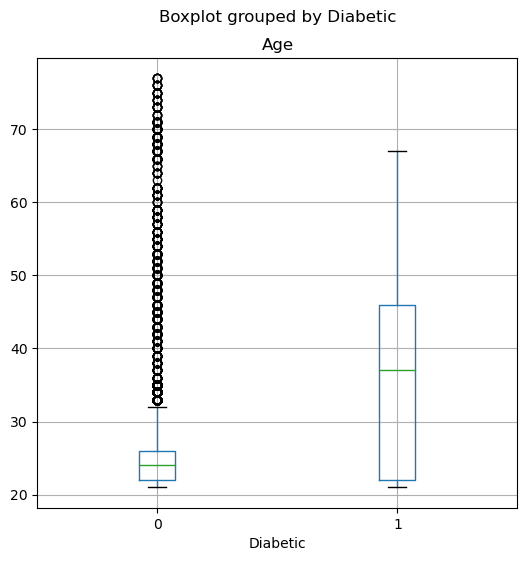

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
Test cases: 4500


In [5]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


In [6]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


In [7]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7888888888888889


Evaluate classification models
Completed
100 XP
4 minutes
The training accuracy of a classification model is much less important than how well that model will work when given new, unseen data. After all, we train models so that they can be used on new data we find in the real world. So, after we have trained a classification model, we should evaluate how it performs on a set of new, unseen data.

In the previous units, we created a model that would predict whether a patient had diabetes or not based on their blood glucose level. Now, when applied to some data that wasn't part of the training set we get the following predictions:

x	y	ŷ
83	0	0
119	1	1
104	1	0
105	0	1
86	0	0
109	1	1
Recall that x refers to blood glucose level, y refers to whether they're actually diabetic, and ŷ refers to the model’s prediction as to whether they're diabetic or not.

Simply calculating how many predictions were correct is sometimes misleading or too simplistic for us to understand the kinds of errors it will make in the real world. To get more detailed information, we can tabulate the results in a structure called a confusion matrix, like this:

A confusion matrix showing 2 true-negatives, 2 true-positives, 1 false-negative, and 1-false positive

The confusion matrix shows the total number of cases where:

The model predicted 0 and the actual label is 0 (true negatives; top left)
The model predicted 1 and the actual label is 1 (true positives; bottom right)
The model predicted 0 and the actual label is 1 (false negatives; bottom left)
The model predicted 1 and the actual label is 0 (false positives; top right)
The cells in the confusion matrix are often shaded so that higher values have a deeper shade. This makes it easier to see a strong diagonal trend from top-left to bottom-right, highlighting the cells where the predicted value and actual value are the same.

From these core values, you can calculate a range of other metrics that can help you evaluate the performance of the model. For example:

Accuracy: (TP+TN)/(TP+TN+FP+FN) - out all of the predictions, how many were correct?
Recall: TP/(TP+FN) - of all the cases that are positive, how many did the model identify?
Precision: TP/(TP+FP) - of all the cases that the model predicted to be positive, how many actually are positive?
